### Logistic regression using multi node single layer NN

In [117]:
#importing python libraries 
import numpy as np
import matplotlib.pyplot as plt

### Data Preprocessing

In [118]:
np.random.seed(1)
m = 400 # number of examples
N = int(m/2) # number of points per class
D = 2 # dimensionality
X = np.zeros((m,D)) # data matrix where each row is a single example
Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
a = 4 # maximum ray of the flower

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
        
X = X.T
Y = Y.T

## Visualization of data

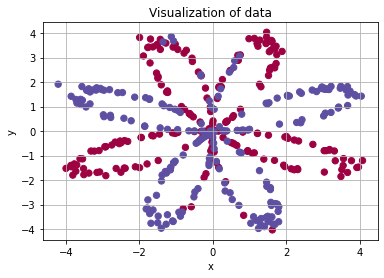

In [119]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of data')
plt.grid()

### The data looks like an flower petal, we will try to fit logistic regression model to this data

In [120]:
shape_X=X.shape
shape_Y=Y.shape
m=Y.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('Number of training examples m:', m)

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
Number of training examples m: 400


In [121]:
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression(random_state=0).fit(X.T, Y.ravel())
print("The parmaeters ",sk_model.get_params())

The parmaeters  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [122]:
print("The accuarcy of the model:",sk_model.score(X.T,Y.ravel())*100)

The accuarcy of the model: 47.0


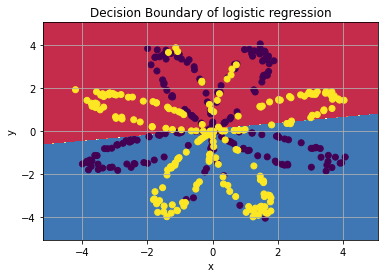

In [123]:
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
model=lambda x: sk_model.predict(x)
Z = model(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.title('Decision Boundary of logistic regression')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.scatter(X[0, :], X[1, :], c=Y)

### Using single hidden layer with multiple nodes 

In [134]:
import numpy as np
# Two -layered neural network with many hidden units

def activation_function(Z):
    '''
    Compute the activation function required from build NN(Neural Networks)

    Inputs:
    Z -- A scalar or numpy array of any size.

    Returns:
    s -- activation_function(z)
    '''

    AF=1/(1+np.exp(-Z))
    return AF

def hypothesis(X,w,b):
    h=np.dot(w,X)+b
    #print('X,w,b,h',X,w,b)
    #print('h',h)
    return h

def cost_function(A,Y):
    m=Y.size
    cost=(1/m)*np.sum((np.multiply(np.log(A),Y)+np.multiply(np.log(1-A),(1-Y))))
    return float(np.squeeze(cost))

def forward_propagation(X,parameters):
    '''
    This function calculates parameter obtained after forward propagation 

    '''
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    Z1=hypothesis(X,w1,b1)
    A1=np.tanh(Z1)
    #A1=activation_function(Z1,type='tanh')
    Z2=hypothesis(A1,w2,b2)
    A2=activation_function(Z2)
    #print(A2.shape)
    fw_pro_cache ={'A1':A1,
                   'A2':A2,
                   'Z1':Z1,
                   'Z2':Z2}

    return A2,fw_pro_cache
    
def back_propagation(X,Y,parameters,cache):
    m=X.shape[1]
    W2=parameters['w2']
    Z1=cache['Z1']
    A1=cache['A1']
    A2=cache['A2']
    dZ2=A2-Y
    dw2=np.dot(dZ2,A1.T)/m
    db2=np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1=np.dot(W2.T,dZ2)*(1-A1**2)
    dw1=np.dot(dZ1,X.T)/m
    db1=np.sum(dZ1,axis=1,keepdims=True)/m

    grads = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2}
    
    return grads

def nn_model(X,Y,dims,num_iter=1000,learning_rate=0.01,print_cost=False):
    np.random.seed(2)
    n_x=X.shape[0]
    n_y=Y.shape[0]
    #print(n_x,n_y)
    w1=np.random.randn(dims,n_x) * 0.01
    b1=np.zeros((dims,1))
    w2=np.random.randn(n_y,dims) * 0.01
    b2=np.zeros((n_y,1))
    #print(w1,b1,w2,b2)
    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
    cost_ap=[]
    for i in range(0, num_iter):
         
        A2, fw_cache = forward_propagation(X, parameters)
        #print(A2.shape)
        cost = cost_function(A2, Y)
        cost_ap.append(cost)
        grads =  back_propagation(X,Y,parameters,fw_cache)
        
        w1 =parameters["w1"]
        b1 =parameters["b1"]
        w2 =parameters["w2"]
        b2 =parameters["b2"]
        
        dw1 =grads["dw1"]
        db1 =grads["db1"]
        dw2 =grads["dw2"]
        db2 =grads["db2"]
        
        w1-=learning_rate*dw1
        b1-=learning_rate*db1
        w2-=learning_rate*dw2
        b2-=learning_rate*db2
        # YOUR CODE ENDS HERE
        
        parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters,cost_ap

def predict(X,parameters):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    return predictions


parameters,cost = nn_model(X, Y, 4,10000, learning_rate=1,print_cost=True)

Cost after iteration 0: -0.693048
Cost after iteration 1000: -0.292290
Cost after iteration 2000: -0.276357
Cost after iteration 3000: -0.240835
Cost after iteration 4000: -0.231060
Cost after iteration 5000: -0.226024
Cost after iteration 6000: -0.222677
Cost after iteration 7000: -0.220185
Cost after iteration 8000: -0.218208
Cost after iteration 9000: -0.216588


In [135]:
print(parameters)

{'w1': array([[  0.14937917,  -9.35943636],
       [-10.33149161,   3.14979223],
       [-10.51142972, -12.36418015],
       [  8.6840671 ,  -9.61057471]]), 'b1': array([[-0.04061479],
       [-0.37537515],
       [-0.04965999],
       [ 0.05527522]]), 'w2': array([[-11.7866962 ,   3.42320045,   6.0527309 ,  10.40347376]]), 'b2': array([[-0.05868774]])}


In [136]:
predictions = predict(X,parameters)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


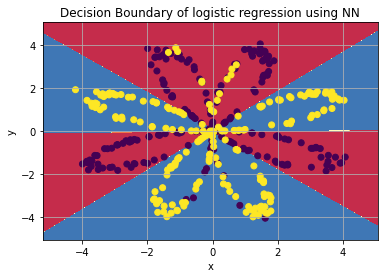

In [139]:
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
model=lambda x: predict(x.T,parameters)
Z = model(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.title('Decision Boundary of logistic regression using NN')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.scatter(X[0, :], X[1, :], c=Y)

Cost after iteration 0: -0.693148
Cost after iteration 1000: -0.637167
Cost after iteration 2000: -0.635215
Cost after iteration 3000: -0.634225
Cost after iteration 4000: -0.633585
Accuracy for 1 hidden units: 67.25 %
Cost after iteration 0: -0.693116
Cost after iteration 1000: -0.583358
Cost after iteration 2000: -0.579758
Cost after iteration 3000: -0.578016
Cost after iteration 4000: -0.576883
Accuracy for 2 hidden units: 67.0 %
Cost after iteration 0: -0.693114
Cost after iteration 1000: -0.288997
Cost after iteration 2000: -0.276223
Cost after iteration 3000: -0.269301
Cost after iteration 4000: -0.264736
Accuracy for 3 hidden units: 90.75 %
Cost after iteration 0: -0.693048
Cost after iteration 1000: -0.292290
Cost after iteration 2000: -0.276357
Cost after iteration 3000: -0.240835
Cost after iteration 4000: -0.231060
Accuracy for 4 hidden units: 90.5 %
Cost after iteration 0: -0.693252
Cost after iteration 1000: -0.287239
Cost after iteration 2000: -0.274034
Cost after iterati

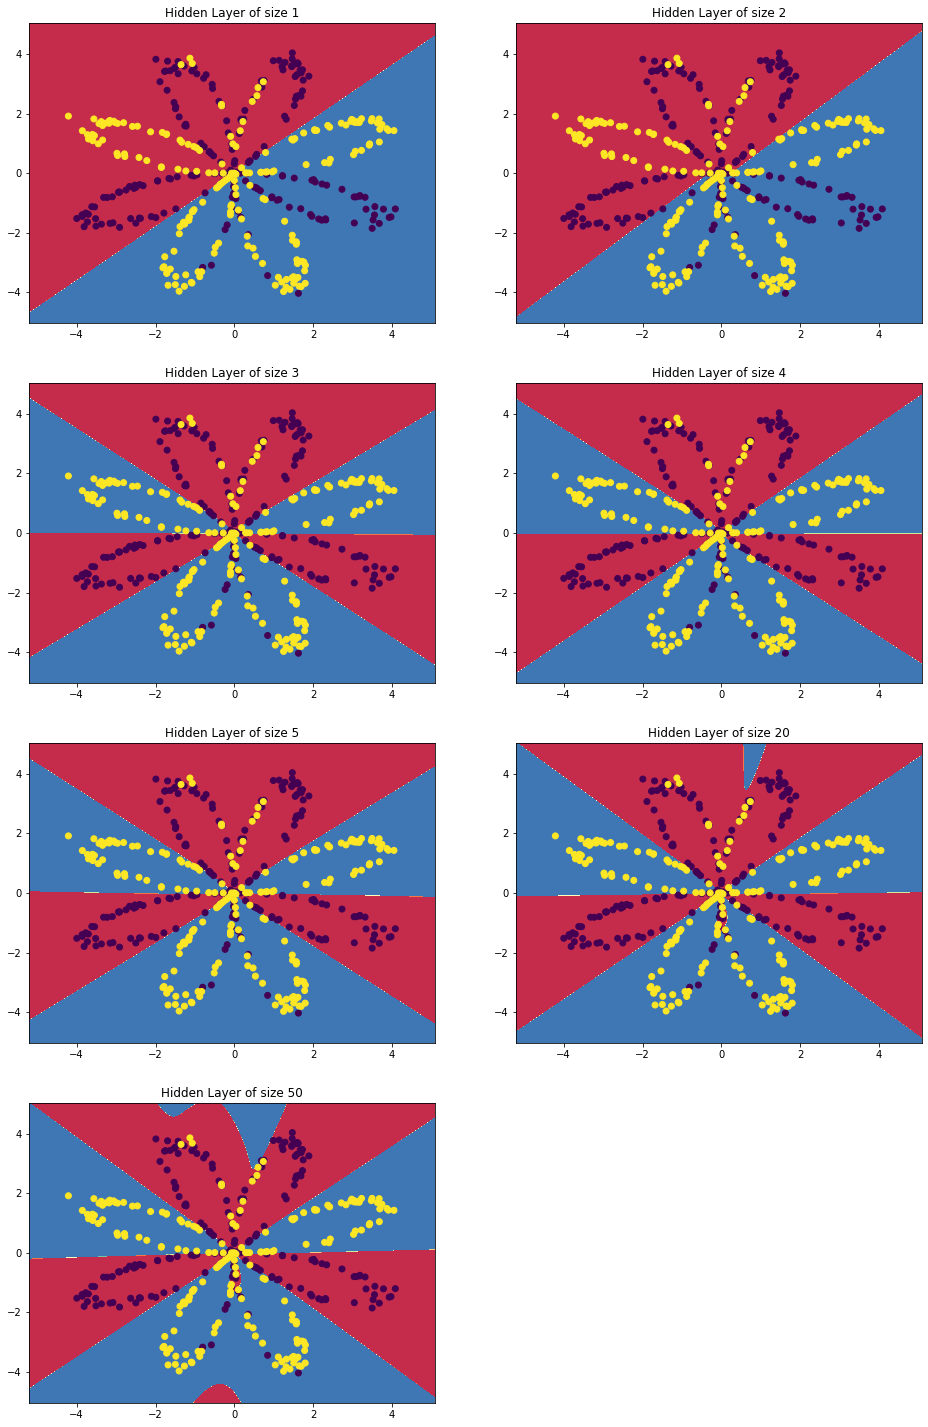

In [142]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, dim in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % dim)
    parameters,cost = nn_model(X, Y, dim,5000, learning_rate=1,print_cost=True)
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    model=lambda x: predict(x.T,parameters)
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y)
    predictions = predict(X, parameters)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(dim, accuracy))